<a href="https://colab.research.google.com/github/Rutujabhonde18/DataScience_Internship/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font><h1><b>OASIS INFOBYTE INTERNSHIP September-23</b></h1></font>
<font><h2><b><i>DATA SCIENCE</i></b></h2></font>

<font><h2><b><u>Task 1 : 'IRIS FLOWER CLASSIFICATION'</u></b></h2></font>

<font><h3><b>Intern : Rutuja Madan Bhonde</b></h3></font>

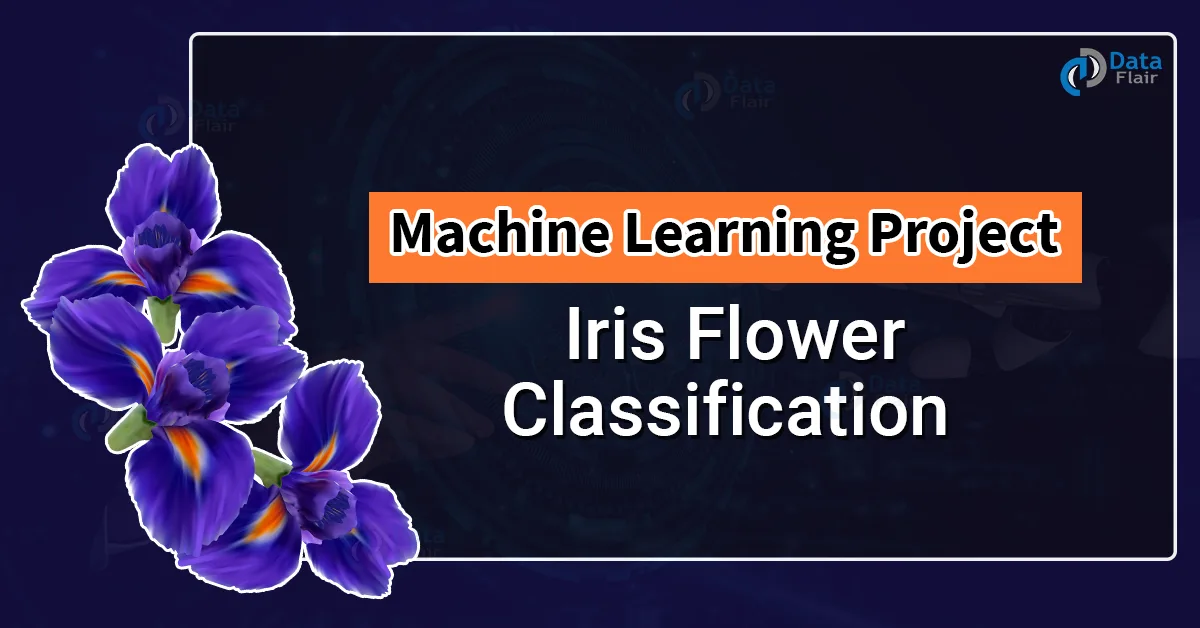

**PROBLEM STATEMENT** : The measurements of iris flower is given according to their species and we have to train a Machine Learning Model that can learn from measurements of iris species and classify them.

# **Importing Libraries**

In [ ]:
# Import libraries for Analysis
import numpy as np
import pandas as pd
import re

# Import Libraries for visualization
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

# Import Libraries for decision
from sklearn.linear_model import LogisticRegression

# Import Libraries for check Performance
from sklearn.metrics import confusion_matrix

# Import Libraries for check accuracy
from sklearn.metrics import accuracy_score

# Import Libraries for train_test_split
from sklearn.model_selection import train_test_split

# **Import dataset**

In [ ]:
# Import dataset into data variable
data = pd.read_csv("/Iris.csv")

# **Data Analysis**

In [ ]:
# show dataset
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#To get first 10 rows
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#To get last 10 rows
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Check rows & columns
data.shape

(150, 6)

In [ ]:
# Basic status about data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# To get information about datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# To check null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

So, there will be no null value in dataset

Now, we calculate number of samples in each class of Iris flower

In [ ]:
# number of sample in each class of iris flower
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

So, we have 3 species each has 50 samples name as:
1. Iris-setosa        
2. Iris-versicolor    
3. Iris-virginica

We,don't need ID column so, we can remove them

In [ ]:
del data["Id"]
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# **Data Visualization**

<ipython-input-16-79155e392dfb>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gs[0])
<ipython-input-16-79155e392dfb>:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


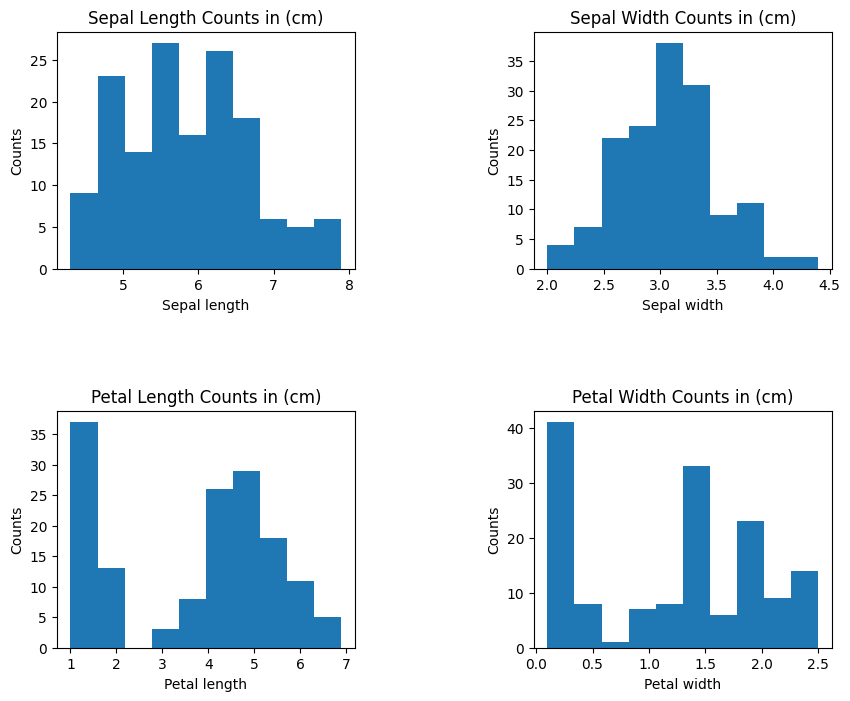

In [ ]:
# Plot histogram for SepalLength, SepalWidth, PetalLength, PetalWidth

plt.subplots(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[4,4], wspace=0.6, height_ratios=[4,4], hspace=0.6)

plt.subplot(gs[0])
sepal_length=data["SepalLengthCm"]
plt.hist(sepal_length,bins=10)
plt.title("Sepal Length Counts in (cm)")
plt.xlabel("Sepal length")
plt.ylabel("Counts")

plt.subplot(gs[1])
sepal_width=data["SepalWidthCm"]
plt.hist(sepal_width,bins=10)
plt.title("Sepal Width Counts in (cm)")
plt.xlabel("Sepal width")
plt.ylabel("Counts")

plt.subplot(gs[2])
petal_length=data["PetalLengthCm"]
plt.hist(petal_length,bins=10)
plt.title("Petal Length Counts in (cm)")
plt.xlabel("Petal length")
plt.ylabel("Counts")

plt.subplot(gs[3])
petal_width=data["PetalWidthCm"]
plt.hist(petal_width,bins=10)
plt.title("Petal Width Counts in (cm)")
plt.xlabel("Petal width")
plt.ylabel("Counts")

plt.tight_layout()
plt.show()

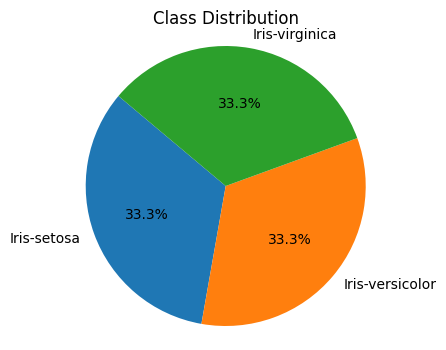

In [ ]:
# Count the occurrences of each class in the 'Species' column
class_counts = data['Species'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Sepal width')

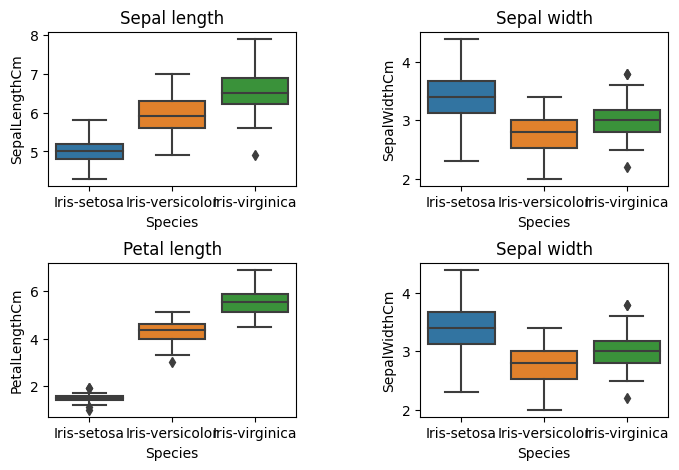

In [ ]:
#Plot Boxplot

plt.figure(figsize=[8,5])
gs=gridspec.GridSpec(2,2,wspace=0.5,hspace=0.5)

plt.subplot(gs[0])
sns.boxplot(x="Species",
            y="SepalLengthCm",data=data)
plt.title("Sepal length")

plt.subplot(gs[1])
sns.boxplot(x="Species",
            y="SepalWidthCm",data=data)
plt.title("Sepal width")

plt.subplot(gs[2])
sns.boxplot(x="Species",
            y="PetalLengthCm",data=data)
plt.title("Petal length")

plt.subplot(gs[3])
sns.boxplot(x="Species",
            y="SepalWidthCm",data=data)
plt.title("Sepal width")

<Figure size 500x500 with 0 Axes>

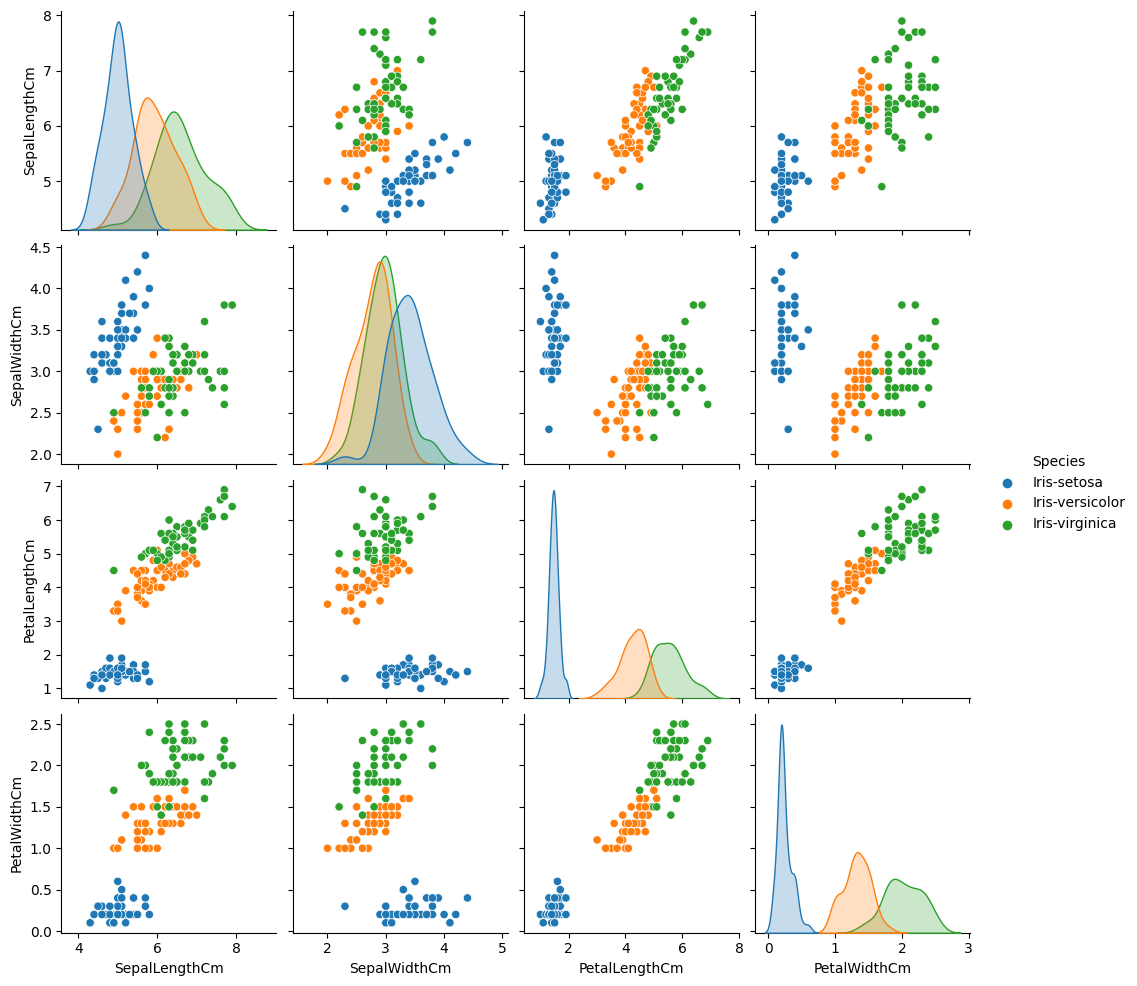

In [ ]:
# Plot pairplot
plt.figure(figsize=(5,5))
sns.pairplot(data,hue="Species")

<ipython-input-20-5895bda84aa9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


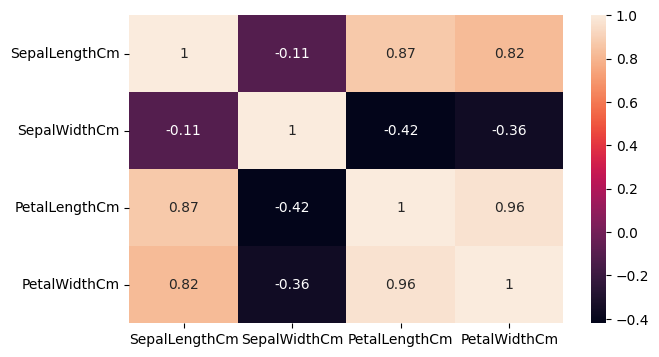

In [ ]:
# Plot Heatmap to find correlation
plt.figure(figsize=(7,4))
sns.heatmap(data.corr(),annot=True)
plt.show()

Petal_Length & Petal_width are highly positively correlated

# **Model Building**

**feature selection**

In [ ]:
X = data.drop("Species",axis=1)
y = data["Species"]

In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

**Spliting the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


**Model Selection (Logistic regresion)**

In [ ]:
Model=LogisticRegression()
Model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#prediction of model
y_pred = Model.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-set

**Now, we check Accuracy of our model**

# **Accuracy**

In [ ]:
# Check acuracy
lr_accuracy = accuracy_score(y_pred,y_test)
lr_accuracy

0.9833333333333333

# **Test the Model**

In [ ]:
#Prediction
Actual = y
predicted = Model.predict(X)

In [ ]:
cf = confusion_matrix(Actual,predicted)
cf

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [ ]:
predicted = Model.predict([[2.1,3.0,5.5,5.0]])
predicted

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

# **Conclusion**

Accuracy of our model is 98%

Also, our model gets predicted perfectly.

So, we can say that it is a good model.